In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Unión de Dataframes

In [39]:
#'''
# Load the DataFrame from the HDF5 file
Train_Air = pd.read_hdf('C:/Users/MARIA PAULA/Downloads/EAFIT/Proyecto de Grado/Air Quality/Train/Train_set_1A.h5', key='df')
Train_Mob = pd.read_hdf('C:/Users/MARIA PAULA/Downloads/EAFIT/Proyecto de Grado/Mobilidad/Train/Mobilidad_1A.h5 ', key='df')

Train_Air = Train_Air.reset_index()

# Cambiar el nombre de la columna
Train_Air.rename(columns={'comuna': 'codigo comuna',
                 'Fecha_Hora':'Fecha Trafico'}, inplace=True)

Train_Mob.reset_index()

# Realizar un inner join entre los dos DataFrames
#df_joined = pd.merge(Train_Mob, Train_Air, on=['Fecha Trafico', 'codigo comuna'], how='left')
#'''


,index,Hora,dia-num,mes-num,año,Velocidad (Km/h),Intensidad,Nº vehiculos long 1,Nº vehiculos long 2,Nº vehiculos long 3,Ocupación,Longitud,Latitud,codigo comuna,operacion_enc,corredor_enc,sentido_enc,Fecha Trafico
0,0,0.0,5.0,1.0,2021.0,17.0,9.0,9.0,0.0,0.0,0.0,835395.4375,1183018.500,10.0,0.0,0.0,1.0,2021-01-01 00:00:00
1,1,1.0,5.0,1.0,2021.0,19.0,11.0,11.0,0.0,0.0,1.0,835395.4375,1183018.500,10.0,0.0,0.0,1.0,2021-01-01 01:00:00
2,2,2.0,5.0,1.0,2021.0,20.0,15.0,15.0,0.0,0.0,0.0,835395.4375,1183018.500,10.0,0.0,0.0,1.0,2021-01-01 02:00:00
3,3,3.0,5.0,1.0,2021.0,18.0,16.0,16.0,0.0,0.0,0.0,835395.4375,1183018.500,10.0,0.0,0.0,1.0,2021-01-01 03:00:00
4,4,4.0,5.0,1.0,2021.0,20.0,22.0,22.0,0.0,0.0,2.0,835395.4375,1183018.500,10.0,0.0,0.0,1.0,2021-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92026,92026,19.0,6.0,9.0,2023.0,4.0,53.0,5.0,0.0,0.0,60.0,835578.7950,1187109.438,4.0,1.0,2.0,1.0,2023-09-30 19:00:00
92027,92027,20.0,6.0,9.0,2023.0,9.0,80.0,25.0,0.0,0.0,70.0,835578.7950,1187109.438,4.0,1.0,2.0,1.0,2023-09-30 20:00:00
92028,92028,21.0,6.0,9.0,2023.0,12.0,110.0,31.0,0.0,0.0,81.0,835578.7950,1187109.438,4.0,1.0,2.0,1.0,2023-09-30 21:00:00
92029,92029,22.0,6.0,9.0,2023.0,10.0,79.0,19.0,4.0,0.0,70.0,835578.7950,1187109.438,4.0,1.0,2.0,1.0,2023-09-30 22:00:00


Los datos de aire tienen mas info que los de mobilidad por lo que recortamos la base de datos del aire

In [ ]:
Train_Air = Train_Air[Train_Air['Fecha Trafico'] <= '2023-10-31 23:00:00']

,Fecha Trafico,pm_25,codigo comuna
107971,2023-10-31 19:00:00,15.648363,4
107972,2023-10-31 20:00:00,18.857600,4
107973,2023-10-31 21:00:00,8.159360,4
107974,2023-10-31 22:00:00,17.466100,4
107975,2023-10-31 23:00:00,15.648363,4


In [50]:
Train_Air.describe().T

,count,mean,min,25%,50%,75%,max,std
Fecha Trafico,99264,2022-06-01 23:30:00,2021-01-01 00:00:00,2021-09-16 11:45:00,2022-06-01 23:30:00,2023-02-15 11:15:00,2023-10-31 23:00:00,NaN
pm_25,99264.0,17.336734,0.0,10.883875,15.86325,22.2345,110.534,9.224225
codigo comuna,99264.0,11.0,4.0,8.5,12.0,14.5,16.0,4.582599


In [47]:
Train_Mob.describe().T

,count,mean,min,25%,50%,75%,max,std
Hora,92031.0,11.506873,0.0,6.0,12.0,18.0,23.0,6.921474
dia-num,92031.0,4.002945,1.0,2.0,4.0,6.0,7.0,2.000381
mes-num,92031.0,6.321924,1.0,3.0,6.0,9.0,12.0,3.323935
año,92031.0,2021.996784,2021.0,2021.0,2022.0,2023.0,2023.0,0.791574
Velocidad (Km/h),92031.0,16.595142,1.0,10.0,13.0,19.0,140.0,12.96336
Intensidad,92031.0,166.658185,0.0,64.0,138.0,225.0,1158.0,130.570235
Nº vehiculos long 1,92031.0,116.065064,-49.731478,32.0,96.951573,176.849042,717.0,96.839585
Nº vehiculos long 2,92031.0,24.285612,0.0,2.0,13.0,31.0,248.0,31.042171
Nº vehiculos long 3,92031.0,9.891814,-2.882954,0.0,3.534678,10.0,307.0,16.913161
Ocupación,92031.0,36.013847,-73.28468,11.0,32.0,58.0,100.0,27.454549


In [49]:
# Verificar si las combinaciones de 'Fecha Trafico' y 'codigo comuna' son únicas en Train_Mob
print(Train_Mob.duplicated(subset=['Fecha Trafico', 'codigo comuna']).sum())

# Verificar si las combinaciones de 'Fecha Trafico' y 'codigo comuna' son únicas en Train_Air
print(Train_Air.duplicated(subset=['Fecha Trafico', 'codigo comuna']).sum())


0
0


In [51]:
# Crear un DataFrame con combinaciones únicas de fechas y comunas en Train_Mob
combinaciones_mob = Train_Mob[['Fecha Trafico', 'codigo comuna']].drop_duplicates()

# Crear un DataFrame con combinaciones únicas de fechas y comunas en Train_Air
combinaciones_air = Train_Air[['Fecha Trafico', 'codigo comuna']].drop_duplicates()

# Contar las combinaciones en Train_Mob
conteo_mob = combinaciones_mob.groupby('codigo comuna').size()

# Contar las combinaciones en Train_Air
conteo_air = combinaciones_air.groupby('codigo comuna').size()

# Crear un DataFrame para comparar
comparacion = pd.DataFrame({'Mob': conteo_mob, 'Air': conteo_air}).fillna(0)

# Verificar diferencias
diferencias = comparacion[comparacion['Mob'] != comparacion['Air']]

if not diferencias.empty:
    print("Diferencias encontradas:\n", diferencias)
else:
    print("Las fechas se repiten para cada comuna en ambos DataFrames.")


Diferencias encontradas:
                  Mob    Air
codigo comuna              
4.0            20826  24816
10.0           23214  24816
14.0           24423  24816
16.0           23568  24816


In [53]:
# Realizamos un left join entre los datasets
df_join = Train_Air.merge(Train_Mob, on=['Fecha Trafico', 'codigo comuna'], how='left', suffixes=('_Air', '_Mob'))

df_join.head()

,Fecha Trafico,pm_25,codigo comuna,Hora,dia-num,mes-num,año,Velocidad (Km/h),Intensidad,Nº vehiculos long 1,Nº vehiculos long 2,Nº vehiculos long 3,Ocupación,Longitud,Latitud,operacion_enc,corredor_enc,sentido_enc
0,2021-01-01 00:00:00,23.7741,16,0.0,5.0,1.0,2021.0,14.0,19.0,18.0,1.0,0.0,2.0,831252.0625,1181124.875,0.0,1.0,0.0
1,2021-01-01 01:00:00,28.5095,16,1.0,5.0,1.0,2021.0,14.0,24.0,23.0,1.0,0.0,1.0,831252.0625,1181124.875,0.0,1.0,0.0
2,2021-01-01 02:00:00,27.2400,16,2.0,5.0,1.0,2021.0,14.0,16.0,15.0,1.0,0.0,4.0,831252.0625,1181124.875,0.0,1.0,0.0
3,2021-01-01 03:00:00,37.8129,16,3.0,5.0,1.0,2021.0,14.0,16.0,15.0,1.0,0.0,2.0,831252.0625,1181124.875,0.0,1.0,0.0
4,2021-01-01 04:00:00,34.1848,16,4.0,5.0,1.0,2021.0,16.0,16.0,14.0,2.0,0.0,3.0,831252.0625,1181124.875,0.0,1.0,0.0


In [54]:
conteo_comunas = df_join.groupby('codigo comuna').size()
print(conteo_comunas)

codigo comuna
4     24816
10    24816
14    24816
16    24816
dtype: int64


In [55]:
#df_joined = pd.read_csv('C:/Users/MARIA PAULA/Downloads/EAFIT/Proyecto de Grado/Programacion/Train_Dataset_joined.csv')
df_joined = df_join.copy()
df_joined.to_csv('C:/Users/MARIA PAULA/Downloads/EAFIT/Proyecto de Grado/Programacion/Train_Dataset_joined.csv', mode='w')

In [56]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99264 entries, 0 to 99263
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Fecha Trafico        99264 non-null  datetime64[ns]
 1   pm_25                99264 non-null  float64       
 2   codigo comuna        99264 non-null  int64         
 3   Hora                 92031 non-null  float64       
 4   dia-num              92031 non-null  float64       
 5   mes-num              92031 non-null  float64       
 6   año                  92031 non-null  float64       
 7   Velocidad (Km/h)     92031 non-null  float64       
 8   Intensidad           92031 non-null  float64       
 9   Nº vehiculos long 1  92031 non-null  float64       
 10  Nº vehiculos long 2  92031 non-null  float64       
 11  Nº vehiculos long 3  92031 non-null  float64       
 12  Ocupación            92031 non-null  float64       
 13  Longitud             92031 non-

In [57]:
def missing_values(df):
    Column_Names = df.columns

    Total_rows = df.shape[0]

    missing_values = df.isnull().sum()

    Percent_missing = (missing_values / Total_rows)*100
    
    result = pd.DataFrame({
        'Column_Name': Column_Names,
        'Missing_Values': missing_values.values,
        'Total_Rows': Total_rows,
        'Percent_Missing': Percent_missing.values
    })

    return result

In [58]:
missing_values(df_joined)

,Column_Name,Missing_Values,Total_Rows,Percent_Missing
0,Fecha Trafico,0,99264,0.00000
1,pm_25,0,99264,0.00000
2,codigo comuna,0,99264,0.00000
3,Hora,7233,99264,7.28663
4,dia-num,7233,99264,7.28663
5,mes-num,7233,99264,7.28663
6,año,7233,99264,7.28663
7,Velocidad (Km/h),7233,99264,7.28663
8,Intensidad,7233,99264,7.28663
9,Nº vehiculos long 1,7233,99264,7.28663


In [59]:
#df_joined = df_joined.drop(['Unnamed: 0', 'Hora', 'dia-num', 'mes-num', 'año', 'Longitud','Latitud', 'Ocupación'], axis =1)
df_joined = df_joined.drop(['Hora', 'dia-num', 'mes-num', 'año', 'Longitud','Latitud', 'Ocupación'], axis =1)

In [60]:
df_joined['Fecha Trafico']= pd.to_datetime(df_joined['Fecha Trafico'], 'coerce')

In [61]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99264 entries, 0 to 99263
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Fecha Trafico        99264 non-null  datetime64[ns]
 1   pm_25                99264 non-null  float64       
 2   codigo comuna        99264 non-null  int64         
 3   Velocidad (Km/h)     92031 non-null  float64       
 4   Intensidad           92031 non-null  float64       
 5   Nº vehiculos long 1  92031 non-null  float64       
 6   Nº vehiculos long 2  92031 non-null  float64       
 7   Nº vehiculos long 3  92031 non-null  float64       
 8   operacion_enc        92031 non-null  float64       
 9   corredor_enc         92031 non-null  float64       
 10  sentido_enc          92031 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 8.3 MB


Como existen combinaciones unicas entre codigo comuna, corredor y sentido pues desde el principio se selecciono un solo carril con su sentido para cada comuna se procede a llenar los datos nulos de sentido y corredor de forma que muestre la misma info por comuna

In [62]:
# DataFrame con las combinaciones únicas conocidas
df_filtrado = df_joined.copy()
combinaciones_unicas = pd.DataFrame({
    'codigo comuna': [10.0, 16.0, 14.0, 4.0],
    'corredor_enc': [0, 1, 3, 2],
    'sentido_enc': [1, 0, 2, 1]
})

# Crear diccionarios de mapeo
corredor_map = dict(zip(combinaciones_unicas['codigo comuna'], combinaciones_unicas['corredor_enc']))
sentido_map = dict(zip(combinaciones_unicas['codigo comuna'], combinaciones_unicas['sentido_enc']))

# Llenar los datos nulos en el DataFrame original
df_filtrado['corredor_enc'] = df_filtrado['corredor_enc'].fillna(df_filtrado['codigo comuna'].map(corredor_map))
df_filtrado['sentido_enc'] = df_filtrado['sentido_enc'].fillna(df_filtrado['codigo comuna'].map(sentido_map))

# Mostrar el DataFrame resultante
missing_values(df_filtrado)

,Column_Name,Missing_Values,Total_Rows,Percent_Missing
0,Fecha Trafico,0,99264,0.00000
1,pm_25,0,99264,0.00000
2,codigo comuna,0,99264,0.00000
3,Velocidad (Km/h),7233,99264,7.28663
4,Intensidad,7233,99264,7.28663
5,Nº vehiculos long 1,7233,99264,7.28663
6,Nº vehiculos long 2,7233,99264,7.28663
7,Nº vehiculos long 3,7233,99264,7.28663
8,operacion_enc,7233,99264,7.28663
9,corredor_enc,0,99264,0.00000


In [63]:
df_filtrado.describe().T

,count,mean,min,25%,50%,75%,max,std
Fecha Trafico,99264,2022-06-01 23:30:00,2021-01-01 00:00:00,2021-09-16 11:45:00,2022-06-01 23:30:00,2023-02-15 11:15:00,2023-10-31 23:00:00,NaN
pm_25,99264.0,17.336734,0.0,10.883875,15.86325,22.2345,110.534,9.224225
codigo comuna,99264.0,11.0,4.0,8.5,12.0,14.5,16.0,4.582599
Velocidad (Km/h),92031.0,16.595142,1.0,10.0,13.0,19.0,140.0,12.96336
Intensidad,92031.0,166.658185,0.0,64.0,138.0,225.0,1158.0,130.570235
Nº vehiculos long 1,92031.0,116.065064,-49.731478,32.0,96.951573,176.849042,717.0,96.839585
Nº vehiculos long 2,92031.0,24.285612,0.0,2.0,13.0,31.0,248.0,31.042171
Nº vehiculos long 3,92031.0,9.891814,-2.882954,0.0,3.534678,10.0,307.0,16.913161
operacion_enc,92031.0,0.416121,0.0,0.0,0.0,1.0,1.0,0.492917
corredor_enc,99264.0,1.5,0.0,0.75,1.5,2.25,3.0,1.11804


In [64]:
df_joined = df_filtrado.copy()

In [65]:
# Especifica las columnas en las que deseas reemplazar los valores negativos
columnas_a_ajustar = ['Nº vehiculos long 1', 
                       'Nº vehiculos long 3'
                       ]

# Reemplazar valores negativos con 0
df_joined[columnas_a_ajustar] = df_joined[columnas_a_ajustar].clip(lower=0)


In [66]:
df_joined.describe().T

,count,mean,min,25%,50%,75%,max,std
Fecha Trafico,99264,2022-06-01 23:30:00,2021-01-01 00:00:00,2021-09-16 11:45:00,2022-06-01 23:30:00,2023-02-15 11:15:00,2023-10-31 23:00:00,NaN
pm_25,99264.0,17.336734,0.0,10.883875,15.86325,22.2345,110.534,9.224225
codigo comuna,99264.0,11.0,4.0,8.5,12.0,14.5,16.0,4.582599
Velocidad (Km/h),92031.0,16.595142,1.0,10.0,13.0,19.0,140.0,12.96336
Intensidad,92031.0,166.658185,0.0,64.0,138.0,225.0,1158.0,130.570235
Nº vehiculos long 1,92031.0,116.262957,0.0,32.0,96.951573,176.849042,717.0,96.563684
Nº vehiculos long 2,92031.0,24.285612,0.0,2.0,13.0,31.0,248.0,31.042171
Nº vehiculos long 3,92031.0,9.891875,0.0,0.0,3.534678,10.0,307.0,16.913121
operacion_enc,92031.0,0.416121,0.0,0.0,0.0,1.0,1.0,0.492917
corredor_enc,99264.0,1.5,0.0,0.75,1.5,2.25,3.0,1.11804


Imputo los datos faltantes con sklearn imputer el modulo IterativeImputer con un modelo de regresion lineal 

In [67]:
# Supongamos que tu DataFrame se llama df
# Primero, asegúrate de que las columnas con datos faltantes sean numéricas
# Seleccionamos las columnas numéricas, excluyendo 'Fecha Trafico' y 'codigo comuna'
columnas_numericas = df_joined.columns.difference(['Fecha Trafico'])

# Aplicar el imputador
imputer = IterativeImputer(estimator=LinearRegression(), max_iter=10, random_state=42)

# Imputar los valores faltantes en las columnas seleccionadas
df_joined[columnas_numericas] = imputer.fit_transform(df_joined[columnas_numericas])

# Convertir la columna 'operacion_enc' a tipo entero para mantenerla binaria
df_joined['operacion_enc'] = df_joined['operacion_enc'].round().astype(int)

c:\Users\MARIA PAULA\Downloads\EAFIT\Proyecto de Grado\Programacion\.venv\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [68]:
df_joined.describe().T

,count,mean,min,25%,50%,75%,max,std
Fecha Trafico,99264,2022-06-01 23:30:00,2021-01-01 00:00:00,2021-09-16 11:45:00,2022-06-01 23:30:00,2023-02-15 11:15:00,2023-10-31 23:00:00,NaN
pm_25,99264.0,17.336734,0.0,10.883875,15.86325,22.2345,110.534,9.224225
codigo comuna,99264.0,11.0,4.0,8.5,12.0,14.5,16.0,4.582599
Velocidad (Km/h),99264.0,16.425482,1.0,10.0,13.0,19.0,140.0,12.52841
Intensidad,99264.0,166.685149,0.0,70.0,147.0,213.0,1158.0,125.771948
Nº vehiculos long 1,99264.0,115.480415,0.0,35.0,95.0,170.0,717.0,93.099453
Nº vehiculos long 2,99264.0,24.12165,0.0,2.0,15.0,28.73889,248.0,29.923784
Nº vehiculos long 3,99264.0,9.737669,0.0,0.0,4.0,9.401649,307.0,16.334119
operacion_enc,99264.0,0.429954,0.0,0.0,0.0,1.0,1.0,0.495072
corredor_enc,99264.0,1.5,0.0,0.75,1.5,2.25,3.0,1.11804


In [69]:
missing_values(df_joined)

,Column_Name,Missing_Values,Total_Rows,Percent_Missing
0,Fecha Trafico,0,99264,0.0
1,pm_25,0,99264,0.0
2,codigo comuna,0,99264,0.0
3,Velocidad (Km/h),0,99264,0.0
4,Intensidad,0,99264,0.0
5,Nº vehiculos long 1,0,99264,0.0
6,Nº vehiculos long 2,0,99264,0.0
7,Nº vehiculos long 3,0,99264,0.0
8,operacion_enc,0,99264,0.0
9,corredor_enc,0,99264,0.0


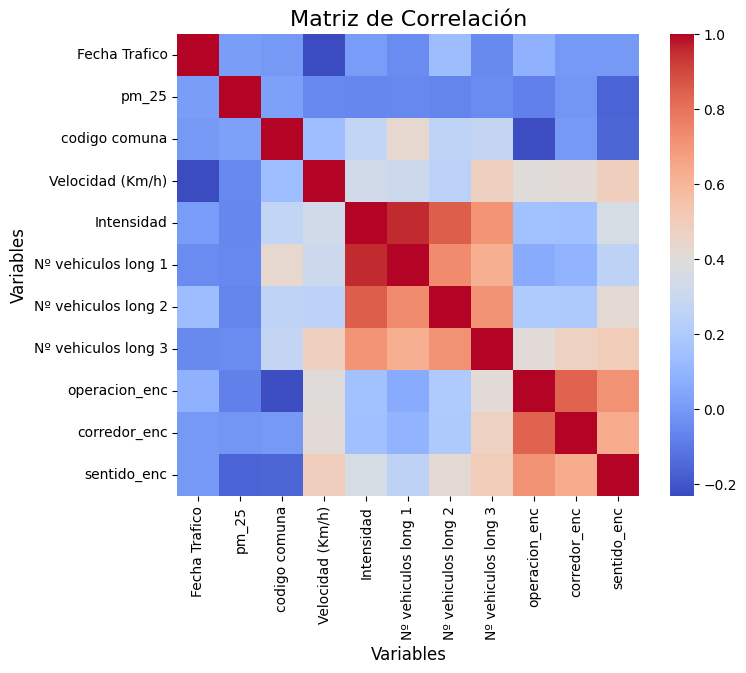

In [70]:
# Calcular la matriz de correlación
correlation_matrix = df_joined.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear un mapa de calor (heatmap) de la matriz de correlación
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True, cbar=True)

# Títulos y etiquetas
plt.title('Matriz de Correlación', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)

# Mostrar la visualización
plt.show()

In [71]:
duplicados = df_joined[df_joined.duplicated(subset=['Fecha Trafico','codigo comuna', 'corredor_enc', 'sentido_enc'], keep=False)]


conteo_duplicados = df_joined.duplicated(subset=['Fecha Trafico','codigo comuna', 'corredor_enc', 'sentido_enc']).sum()
conteo_duplicados 

np.int64(0)

In [72]:
df_joined.to_csv('C:/Users/MARIA PAULA/Downloads/EAFIT/Proyecto de Grado/Programacion/Unificado.csv', mode='w')